In [1]:
import numpy as np, matplotlib.pyplot as plt
from numpy import *
import pylab
import scipy as scipy
from scipy.io import wavfile
from numpy.fft import *
import scipy.signal as signal
from matplotlib.pyplot import *
import IPython

# Case 1

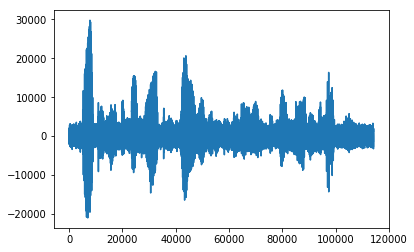

In [2]:
samplerate, sound = wavfile.read('case1.wav')
IPython.display.display(IPython.display.Audio(sound, rate=samplerate))
plt.plot(sound)

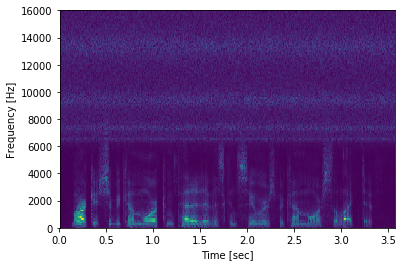

In [3]:
#Spectogram of input sound
f, t, Sxx = signal.spectrogram(sound, samplerate)
plt.pcolormesh(t, f, Sxx**0.3)
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
plt.show()

# Lowpass FIR Filter

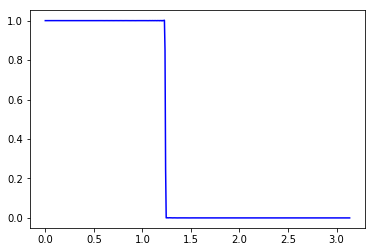

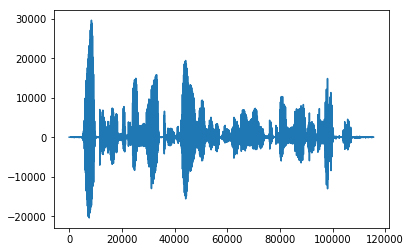

In [4]:
freq_cutoff = 6300/samplerate
tran_band = 100/samplerate

order = int(np.ceil((4 / tran_band)))

if order % 2 == 0: 
    order = order + 1

n = np.arange(order) 
filt = np.sinc(2*freq_cutoff*(n - (order - 1) / 2.))

window = np.hamming(order) 
filt = filt * window 
filt = filt / np.sum(filt)

f_sound = np.convolve(sound, filt)

#Filter Impulse 
w, h = signal.freqz(filt) 
plt.plot(w, abs(h), 'b') 
plt.show()

IPython.display.display(IPython.display.Audio(f_sound, rate=samplerate)) 
plt.plot(f_sound)

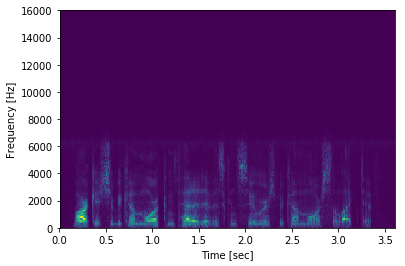

In [5]:
f, t, Sxx = signal.spectrogram(f_sound, samplerate)
plt.pcolormesh(t, f, Sxx**0.3)
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
plt.show()

# Lowpass Butterworth IIR Filter

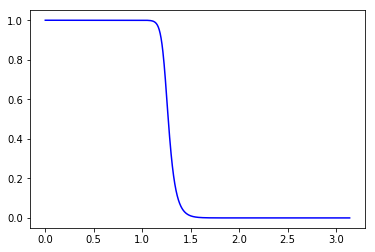

In [6]:
b, a = signal.iirfilter(17, 6300/(samplerate/2), btype='lowpass',analog=False, ftype='butter')
w, h  = signal.freqz(b, a, 1000)
plt.plot(w, abs(h), 'b')
plt.show()

# Case 2

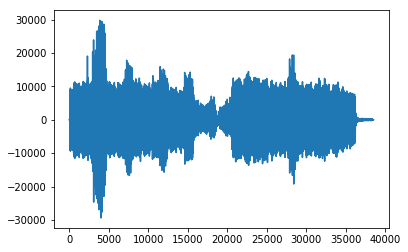

In [7]:
samplerate, sound = wavfile.read('case2.wav')
IPython.display.display(IPython.display.Audio(sound, rate=samplerate))
plt.plot(sound)

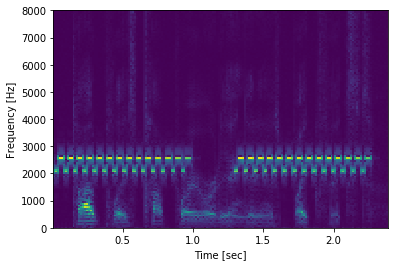

In [8]:
#Spectogram of input sound
f, t, Sxx = signal.spectrogram(sound, samplerate)
plt.pcolormesh(t, f, Sxx**0.3)
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
plt.show()

# Bandstop FIR Filter

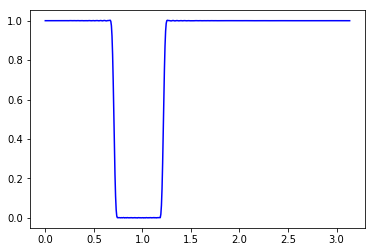

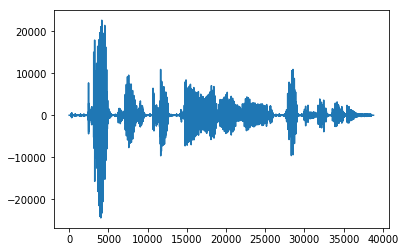

In [9]:
low_cutoff = 1800/samplerate  
high_cutoff = 3100/samplerate 
tran_band = 200/samplerate  

order = int(np.ceil((4 / tran_band)))

if order % 2 == 0:
    order = order + 1
    
n = np.arange(order)

window = np.hamming(order)
 
lowpass = np.sinc(2 * low_cutoff * (n - (order - 1) / 2.))
lowpass = lowpass * window
lowpass = lowpass / np.sum(lowpass)

highpass = np.sinc(2 * high_cutoff * (n - (order - 1) / 2.))
highpass = highpass * window
highpass = highpass / np.sum(highpass)
highpass = -highpass

mid_idx = (order-1)//2
highpass[mid_idx] = highpass[mid_idx] + 1
 
# Add both filters.
filt = lowpass + highpass

w, h = signal.freqz(filt) 
plt.plot(w, abs(h), 'b') 
plt.show()

f_sound = np.convolve(sound, filt)

IPython.display.display(IPython.display.Audio(f_sound, rate=samplerate))
plt.plot(f_sound)

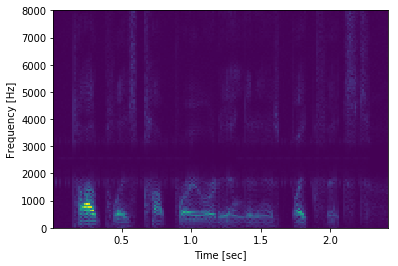

In [10]:
f, t, Sxx = signal.spectrogram(f_sound, samplerate)
plt.pcolormesh(t, f, Sxx**0.3)
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
plt.show()

# Bandstop Butterworth IIR Filter

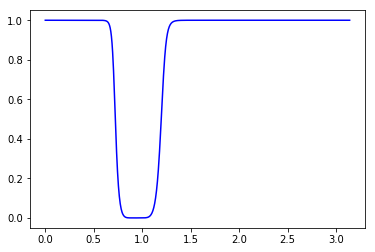

In [11]:
b, a = signal.iirfilter(7, [1800/(samplerate/2), 3100/(samplerate/2)], btype='bandstop',analog=False, ftype='butter')
w, h  = signal.freqz(b, a, 1000)
plt.plot(w, abs(h), 'b')
plt.show()

# Case 3

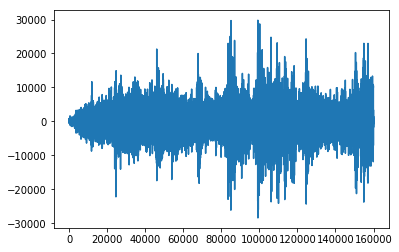

In [12]:
samplerate, sound = wavfile.read('case3.wav')
IPython.display.display(IPython.display.Audio(sound, rate=samplerate))
plt.plot(sound)

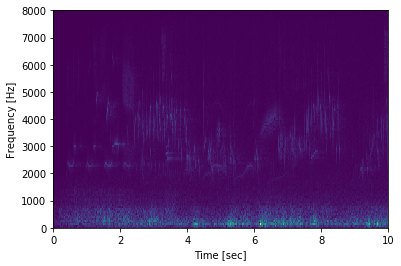

In [13]:
#Spectogram of input sound
f, t, Sxx = signal.spectrogram(sound, samplerate)
plt.pcolormesh(t, f, Sxx**0.3)
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
plt.show()

# Highpass FIR Filter

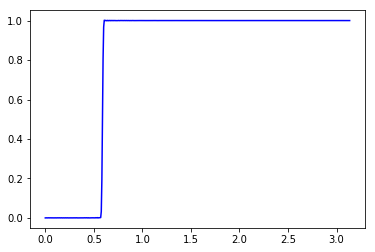

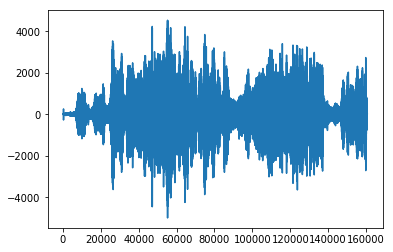

In [14]:
cutoff_freq = 1500/samplerate 
tran_band = 100/samplerate 

order = int(np.ceil((4 / tran_band)))

if order % 2 == 0: 
    order = order + 1

n = np.arange(order)

filt = np.sinc(2 * cutoff_freq * (n - (order - 1) / 2.))
window = np.hamming(order)
filt = filt * window 

filt = filt / np.sum(filt)

filt = -filt 

mid_idx = (order-1)//2 
filt[mid_idx] = filt[mid_idx] + 1

w, h = signal.freqz(filt) 
plt.plot(w, abs(h), 'b') 
plt.show()

f_sound = np.convolve(sound, filt)

IPython.display.display(IPython.display.Audio(f_sound, rate=samplerate)) 
plt.plot(f_sound)

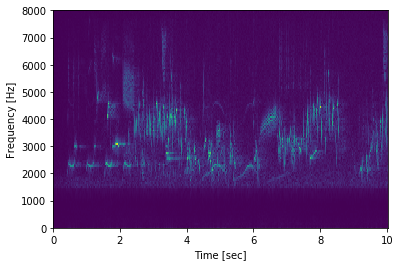

In [15]:
f, t, Sxx = signal.spectrogram(f_sound, samplerate)
plt.pcolormesh(t, f, Sxx**0.3)
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
plt.show()

# Highpass Butterworth IIR Filter

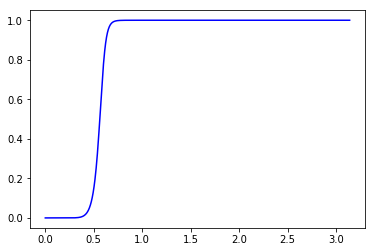

In [16]:
b, a = signal.iirfilter(11, 1500/(samplerate/2), btype='highpass',analog=False, ftype='butter')
w, h  = signal.freqz(b, a, 1000)
plt.plot(w, abs(h), 'b')
plt.show()

# Case 4

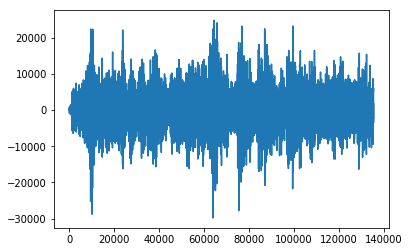

In [17]:
samplerate, sound = wavfile.read('case4.wav')
IPython.display.display(IPython.display.Audio(sound, rate=samplerate))
plt.plot(sound)

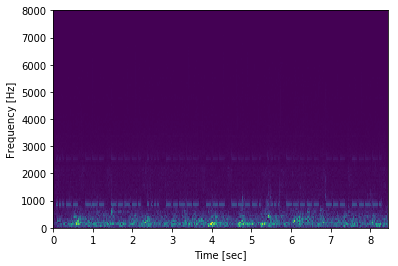

In [18]:
#Spectogram of input sound
f, t, Sxx = signal.spectrogram(sound, samplerate)
plt.pcolormesh(t, f, Sxx**0.3)
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
plt.show()

# Bandpass FIR Filter

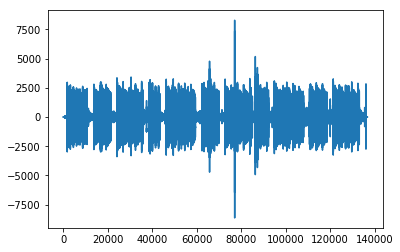

In [19]:
low_cutoff = 700/samplerate  
high_cutoff = 1300/samplerate  
tran_band = 100/samplerate 

order = int(np.ceil((4 / tran_band)))

if order % 2==0: 
    order =order + 1  # Make sure that order is odd.
    
n = np.arange(order)

window = np.hamming(order)
 
lowpass = np.sinc(2 * high_cutoff * (n - (order - 1) / 2.))
lowpass = lowpass * window
lowpass = lowpass / np.sum(lowpass)
 
highpass = np.sinc(2 * low_cutoff * (n - (order - 1) / 2.))
highpass = highpass * window
highpass = highpass / np.sum(highpass)
highpass = -highpass

mid_idx = (order-1)//2
highpass[mid_idx] =  highpass[mid_idx] + 1

filt = np.convolve(lowpass, highpass)

f_sound = np.convolve(sound, filt)

IPython.display.display(IPython.display.Audio(f_sound, rate=samplerate)) 
plt.plot(f_sound)

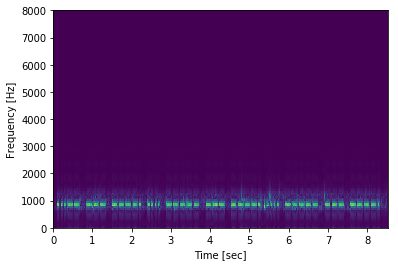

In [20]:
f, t, Sxx = signal.spectrogram(f_sound, samplerate)
plt.pcolormesh(t, f, Sxx**0.3)
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
plt.show()

# Bandpass Butterworth IIR Filter

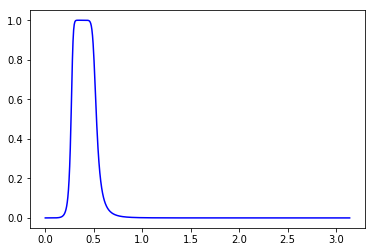

In [21]:
b, a = signal.iirfilter(5, [700/(samplerate/2), 1300/(samplerate/2)] ,btype='bandpass',analog=False, ftype='butter')
w, h  = signal.freqz(b, a, 1000)
plt.plot(w, abs(h), 'b')
plt.show()

# Equalizer

In [25]:
def equalizer(input_sound, samplerate, gain_vector):
    
    taps = signal.firwin2(151, [0.0, 100/(samplerate/2), 200/(samplerate/2), 400/(samplerate/2), 800/(samplerate/2),1600/(samplerate/2), 3200/(samplerate/2), 6300/(samplerate/2), 1.0], gain_vector)
    w,h = signal.freqz(taps)
    plt.plot(w, abs(h))
    plt.show()
    
    f_sound = np.convolve(input_sound, taps)
    return f_sound

## Above is the equalizer that takes in input sound, Sample rate and the gain vector. We use this function to carry out a similar low pass operation as we do on case1 in question1 to showcase the functionality of the equalizer. For this purpose, in addition to the required frequency bands, I have also added 6300Hz to my function above. This can be modifed to incorporate any number of frequency bands, depending on the output you want

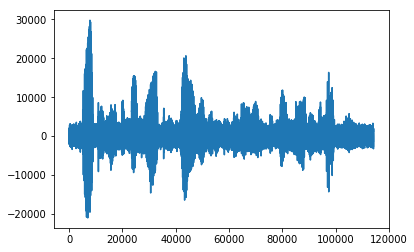

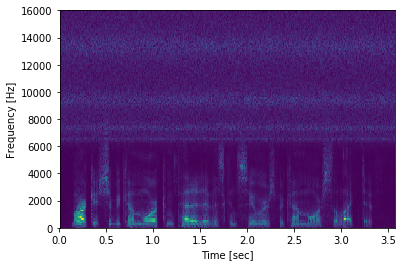

In [26]:
samplerate, sound = wavfile.read('case1.wav')
IPython.display.display(IPython.display.Audio(sound, rate=samplerate))
plt.plot(sound)
plt.show()

f, t, Sxx = signal.spectrogram(sound, samplerate)
plt.pcolormesh(t, f, Sxx**0.3)
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
plt.show()

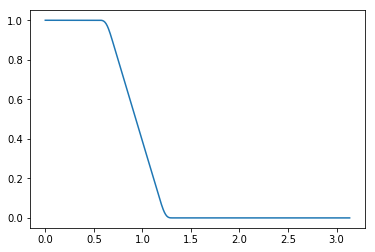

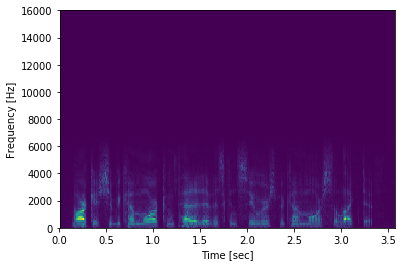

In [27]:
gain_vector = [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 0.0]
equalized = equalizer(sound, samplerate, gain_vector)

IPython.display.display(IPython.display.Audio(equalized, rate=samplerate))

f, t, Sxx = signal.spectrogram(equalized, samplerate)
plt.pcolormesh(t, f, Sxx**0.3)
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
plt.show()